In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [142]:
raw_games = pd.read_csv("../examples/steam-200k.csv")

In [143]:
raw_games

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


As we can see there is somethring wrong. The column names are actually the names row0 should be. So we have to move the column names to row 0 and then rename them afterwards

In [144]:
raw_games.loc[0,]

151603712                                      151603712
The Elder Scrolls V Skyrim    The Elder Scrolls V Skyrim
purchase                                            play
1.0                                                  273
0                                                      0
Name: 0, dtype: object

In [145]:
new_row = pd.Series(raw_games.columns)
new_row

0                     151603712
1    The Elder Scrolls V Skyrim
2                      purchase
3                           1.0
4                             0
dtype: object

In [146]:
raw_games.rename(columns={"151603712":0,"The Elder Scrolls V Skyrim":1,"purchase":2,"1.0":3,"0":4},inplace=True)

In [147]:
raw_games.append(new_row,ignore_index=True)

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,play,273,0
1,151603712,Fallout 4,purchase,1,0
2,151603712,Fallout 4,play,87,0
3,151603712,Spore,purchase,1,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199995,128470551,Grand Theft Auto Vice City,purchase,1,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1,0
199998,128470551,RUSH,play,1.4,0


In [148]:
raw_games.rename(columns={0:"ID",1:"Title",2:"Status",3:"Hours played"},inplace=True)
raw_games

,ID,Title,Status,Hours played,4
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


We drop column number 4 because it only contained zeros

In [149]:
raw_games.drop(columns=4,inplace=True)

In [150]:
raw_games.sort_values(by=["ID","Title"],inplace=True)

As we can see there is no missing data in the whole dataframe

In [151]:
raw_games.isna().mean()

ID              0.0
Title           0.0
Status          0.0
Hours played    0.0
dtype: float64

To get the actual number of games purchased we look if the status is purchased or not. If it is we display it in the new df. This way we don't have any duplicate data for the same user who has purchased and played the game

In [152]:
purchase_only = raw_games[raw_games.Status.str.contains("purchase")]
purchase_only

,ID,Title,Status,Hours played
65428,5250,Alien Swarm,purchase,1.0
65422,5250,Cities Skylines,purchase,1.0
65434,5250,Counter-Strike,purchase,1.0
65435,5250,Counter-Strike Source,purchase,1.0
65436,5250,Day of Defeat,purchase,1.0
...,...,...,...,...
18801,309626088,Age of Empires II HD Edition,purchase,1.0
170023,309812026,Counter-Strike Nexon Zombies,purchase,1.0
170024,309812026,Robocraft,purchase,1.0
10220,309824202,Dota 2,purchase,1.0


In [153]:
purchase_only.groupby("Title").count().loc["Dota 2","ID"]

4841

We now plot the top 5 steam games purchases

In [154]:
purchase_only.Title.value_counts()

Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
                                   ... 
Mind Snares Alice's Journey           1
Nostradamus The Last Prophecy         1
Tobe's Vertical Adventure             1
Fallout 3 - The Pitt                  1
Sweezy Gunner                         1
Name: Title, Length: 5155, dtype: int64

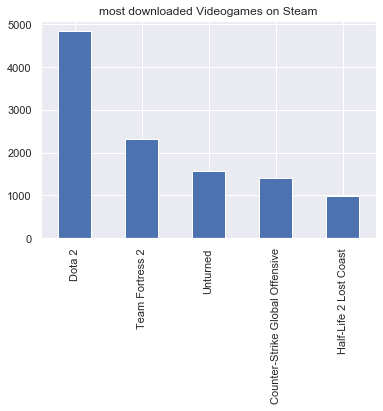

In [155]:
purchase_only.Title.value_counts().head().plot.bar(title="most downloaded Videogames on Steam")

When we check for the rows where the status says *play* we sum the values of Hours played per game to see which game is played the most. As we can see **DOTA 2** is played the most what you might expectr given the many downloads it has

In [156]:
raw_games[raw_games["Status"]
          .str.contains("play")].groupby("Title").sum().sort_values(by="Hours played",ascending=False)[["Hours played"]]

,Hours played
Title,
Dota 2,981684.6
Counter-Strike Global Offensive,322771.6
Team Fortress 2,173673.3
Counter-Strike,134261.1
Sid Meier's Civilization V,99821.3
...,...
Guardians of Orion,0.1
Your Doodles Are Bugged!,0.1
The Fish Fillets 2,0.1


we might want to see who of the participants is the biggest NERD and has played the most time

In [157]:
purchase_only.groupby("ID").sum().sort_values(by="Hours played",ascending=False)

,Hours played
ID,
62990992,1075.0
33865373,783.0
30246419,766.0
58345543,667.0
76892907,597.0
...,...
169958335,1.0
169953184,1.0
169919297,1.0


And as we can see the biggest nerd we have is user **62990992** with a converted 44 days played video games. Not bad man	

As we don't have that many columns to work with I think we have done the most important data manipulations and have gotten some interesting results. If you have ideas what else I could do with the data let me know